In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [15]:
df = pd.read_csv('world-happiness-report-2019.csv')
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [16]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [17]:
df = df.fillna(method = 'ffill')
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,78.500000,77.814103,78.025641,77.897436,77.935897,75.891026,78.025641,76.506410,75.083333
std,45.177428,45.177428,44.803918,44.744861,44.762049,44.750877,42.661998,44.744861,43.849669,43.319661
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.750000,39.750000,39.750000,39.750000,39.750000,39.750000,38.750000,37.750000
50%,78.500000,78.500000,77.500000,78.500000,77.500000,77.500000,76.500000,78.500000,76.500000,75.500000
75%,117.250000,117.250000,116.250000,116.250000,116.250000,116.250000,113.250000,116.250000,114.250000,112.250000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


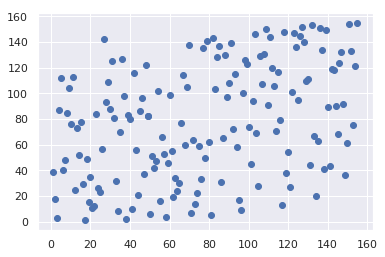

In [41]:
plt.scatter(x = 'Positive affect',
          y = 'Negative affect',
          data = df)

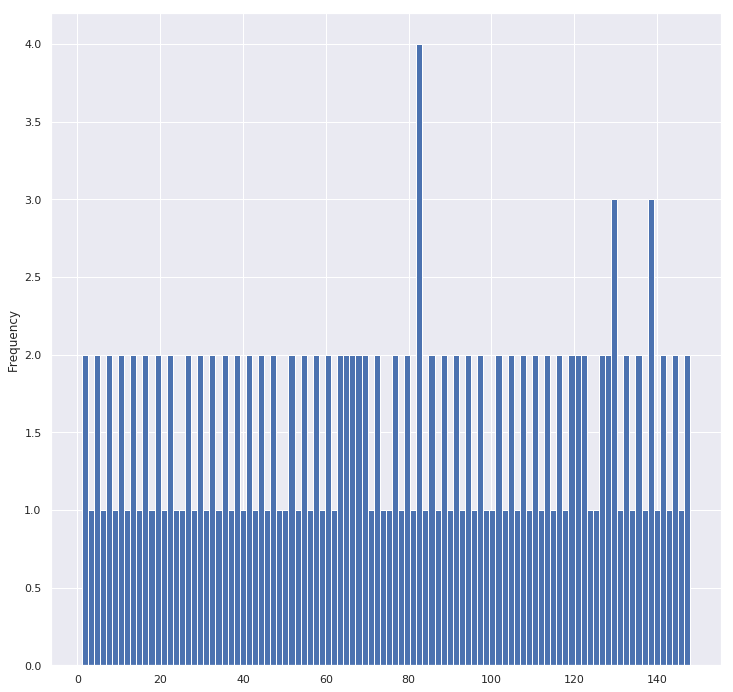

In [57]:
#Distribution Generosity
df['Corruption'].plot(kind = 'hist',bins = 100,figsize = (12,12))

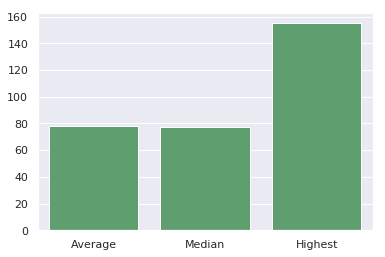

In [59]:
x = ['Average','Median', 'Highest']
y = np.array([df['Positive affect'].mean(), df['Positive affect'].median(), df['Positive affect'].max()])
sns.barplot(x, y, color = 'g')


In [23]:
from sklearn.cluster import KMeans

X = df[['Freedom', 'Corruption']]
km_iner = []
for i in range(1, 12):
    km = KMeans(n_clusters = i)
    km.fit(X)
    km_iner.append(km.inertia_)

Text(0.5, 0, 'Number of cluster')

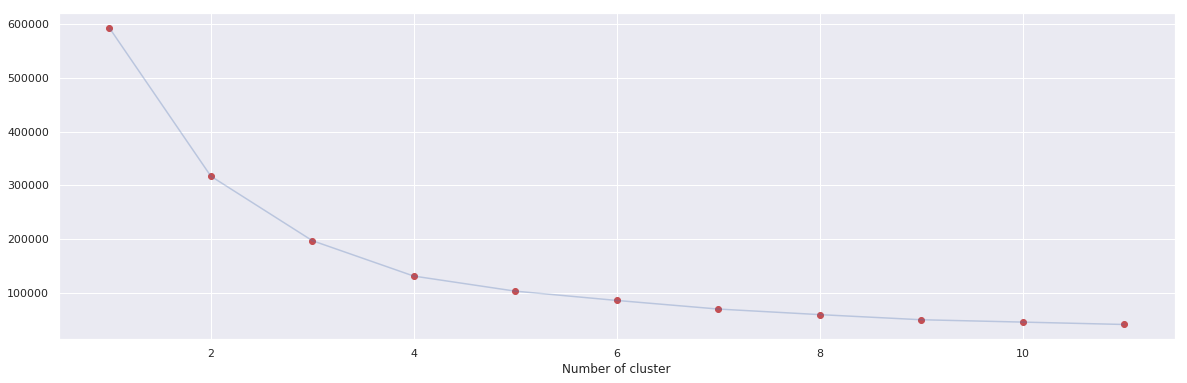

In [24]:
ax, figsize = plt.subplots(figsize = (20, 6))
plt.plot(range(1, 12), km_iner, 'ro')
# range(1, 12) = np.arange(1, 12)
plt.plot(np.arange(1, 12), km_iner, '-', alpha = 0.3)
plt.xlabel('Number of clusters')

In [25]:
"""kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')"""

In [44]:
#Postive affect v Generosity
#Negative affect v corruption
#Log of GDP per capita v Healthy life expectancy
# Social support v corruption
#kmean cluster corruption v GDP
#region average
#linear regression predict 

In [60]:
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0
